# MALIS 19.3 WPM_T9.2
## Datenanalyse der offenen Daten der Seattle Public Library (Checkouts)
Mit fünf verschiedenen Fragen werden die Checkout-Daten analysiert und die Lösungen implementiert. Hierfür werden die Checkout-Daten der Public Library des Jahres 2019 importiert. Die Datenmenge wird auf 10.000 Zeilen begrenzt.

### Erster Schritt: Packages importieren
Vor dem Download der Checkout-Daten werden zwei hilfeiche Packages importiert: urllib.request und pandas.

In [1]:
import urllib.request
import pandas as pd

### Zweiter Schritt: Checkout-Daten downloaden

In [2]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000"
spl_file = "checkouts.csv"

In [3]:
# Überprüfen
spl_file

'checkouts.csv'

In [4]:
# Überprüfen
url

'https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000'

In [5]:
urllib.request.urlretrieve(url, spl_file)

('checkouts.csv', <http.client.HTTPMessage at 0x7f0ef1324ad0>)

In [6]:
checkouts = pd.read_csv(spl_file)

In [7]:
checkouts

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,AUDIOBOOK,2019,12,2,The Teenage Brain (Enchanced): A Neuroscientis...,Frances E. Jensen,"Nonfiction, Psychology",HarperCollins Publishers Inc.,2015
1,Physical,Horizon,BOOK,2019,12,3,Richard Scarry's Smokey the fireman.,"Scarry, Richard","Fire fighters Juvenile fiction, Animals Juveni...","Random House,",2015.
2,Physical,Horizon,BOOK,2019,12,1,Vernon Subutex : roman. Tome 1 / Virginie Desp...,"Despentes, Virginie, 1969-","Music stores France Paris Fiction, Businessmen...",Grasset : Les Éditions Graset & Fasquelle : Li...,janvier 2018.
3,Physical,Horizon,BOOK,2019,12,1,The lost Gospel of Mary : the Mother of Jesus ...,NaN,Mary Blessed Virgin Saint,"Paraclete Press,",[2007]
4,Digital,OverDrive,EBOOK,2019,12,2,"Be Mine Forever: Bennetts Series, Book 3",Kennedy Ryan,"Fiction, Literature, Romance","Hachette Digital, Inc.",2015
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2019,12,1,Artemisia Gentileschi : the image of the femal...,"Garrard, Mary D.",Gentileschi Artemisia 1593 1652 or 1653 Critic...,"Princeton University Press,",[1989]
9996,Digital,OverDrive,EBOOK,2019,12,1,"Birth of an Empire: Genghis Series, Book 1",Conn Iggulden,"Fiction, Historical Fiction","Random House, Inc.",2010
9997,Digital,OverDrive,EBOOK,2019,12,1,"An Affair Without End: Willowmere Series, Book 3",Candace Camp,"Fiction, Historical Fiction, Romance","Simon & Schuster, Inc.",2014
9998,Physical,Horizon,BOOK,2019,12,1,The vine basket / Josanne La Valley.,"La Valley, Josanne","Basket making Juvenile fiction, Fathers and da...","Clarion Books, Houghton Mifflin Harcourt,",[2013]


In [8]:
# Überraschung: ich hatte die Ausleihdaten aller 12 Monate erwartet!
# Grund: Es liegt vermutlich an der Begrenzung der Zeilen auf 10.000.
# Es ergeben sich aber direkt Fragen zu den Ausleihdaten von Dezember 2019.

## 1. Frage: Welches Medium wurde im Dezember 2019 am häufigsten ausgeliehen?

In [9]:
# Zur besseren Übersicht die Namen der Spalten auflisten:
checkouts.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

In [10]:
# Wie lautet die Zahl der höchsten Ausleihe? Spalte: checkouts
checkouts.checkouts.max()

560

In [11]:
# Nun wird es spannend: Welches Medium hatte 560 Ausleihen? Gesucht wird die Zeile:
checkmax = checkouts.checkouts.max()

In [12]:
# Zum Überprüfen:
checkmax

560

In [13]:
# Anzeigen der Zeile und somit des Mediums mit der höchsten Anzahl an Ausleihen
checkouts[checkouts.checkouts >= checkmax]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
7134,Physical,Horizon,BOOK,2019,12,560,The testaments / Margaret Atwood.,"Atwood, Margaret, 1939-","Surrogate mothers Fiction, Man woman relations...","Nan A. Talese/Doubleday,",[2019]


In [14]:
# Antwort der 1. Frage: Das analoge Buch "The testaments" von Margaret Atwood wurde am häufigsten ausgeliehen.

## 2. Frage: Wie hoch ist die durchschnittliche Ausleihe der Public Library im Dezember 2019?
Der im Dezember am häufigsten ausgeliehene Titel hat mit 560 Checkouts eine erstaunlich hohe Zahl. Es stellt sich die Frage, ob alle Medien der Stadtbibliothek in diesem Monat hohe Ausleihen hatten oder ob der Bestseller-Titel von Margaret Atwood ein sog. Ausreißer ist.

In [15]:
# Wie hoch war die durchschnittliche Ausleihe?
checkouts.checkouts.mean()

3.652

In [16]:
# Und wie hoch war denn die geringste Ausleihe?
checkouts.checkouts.min()

1

In [17]:
# Der Median wird nun wahrscheinlich zeigen, dass der Maximalwert 560 ein absoluter Ausreißer ist:
checkouts.checkouts.median()

2.0

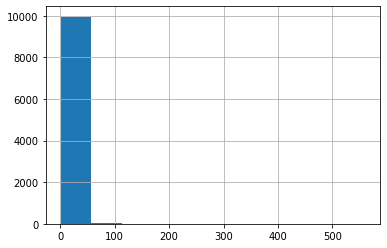

In [18]:
# Anzeigen aller Ausleihzahlen mit einem Historgramm:
checkouts["checkouts"].hist()
# Warum zeigt das Histogramm nur einen Balken an??

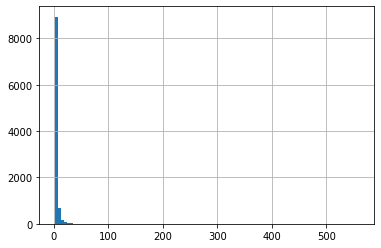

In [19]:
# Mit feinerer Auflösung plotten:
checkouts["checkouts"].hist(bins=100)
# Doch richtig gemacht! Nun erkenne ich auch die schmale Linie rechts neben dem Balken im 1. Histogramm.

## Fazit aus Frage 1 + 2
Die durchschnittlichen Ausleihzahlen von Dezember 2019 entsprechen mit 3 - 4 Ausleihen (Mittelwert) bzw. 2 Ausleihen (Medien) pro Ttiel den üblichen Zahlen einer öffentlichen Bibliothek. Es wäre interessant nachzuforschen, wieso der Buchtitel "The testaments" von Atwood eine so hohe Ausleihzahl hatte oder ob es sich um einen Eingabefehler handelt.